Megh Nikesh Bhatt

IU2141230012

CSE-A, SEM-6

DSC Poject: Fraudulent E-Commerce Transactions


# ***Problem statement:***
E-commerce fraud is a significant and growing problem, leading to financial losses for businesses and a negative experience for customers. Fraudsters employ various tactics like stolen credit cards, account takeover, and friendly fraud, causing financial chargebacks, operational disruptions, and reputational damage.

# **Target variable:**
Transaction amount

# 1.Importing Libraries and loading the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

In [ ]:
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,24-03-2024 23:42,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,22-01-2024 00:53,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,22-01-2024 08:06,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,16-01-2024 20:34,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,16-01-2024 15:47,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.shape

(23634, 16)

**No of records: 23634**

**No of columns: 16**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction Amount,23634.0,229.367099,282.046669,10.0,69.07,151.415,296.1275,9716.5
Quantity,23634.0,3.000550,1.419663,1.0,2.00,3.000,4.0000,5.0
Customer Age,23634.0,34.560210,10.009471,-2.0,28.00,35.000,41.0000,73.0
Is Fraudulent,23634.0,0.051705,0.221436,0.0,0.00,0.000,0.0000,1.0
Account Age Days,23634.0,178.660531,107.388682,1.0,84.00,178.000,272.0000,365.0
Transaction Hour,23634.0,11.266015,6.980659,0.0,5.00,11.000,17.0000,23.0


we can see that Customer age minimun value is -2 which is not possible so we have to fix the Customer Age Column

# 2.Extracting information and exploring the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.isna().sum()

,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
mean_age = df['Customer Age'].mean()
df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age

<ipython-input-41-5a20593dc2b4>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '34.56020986714056' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Customer Age'] < 10, 'Customer Age'] = mean_age


In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.741608,0.051705,178.660531,11.266015
std,282.046669,1.419663,9.746543,0.221436,107.388682,6.980659
min,10.000000,1.000000,10.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


Fixed the customer age problem.

In [ ]:
#Checking for duplicacy
df.duplicated().sum()

0

# 3.Exploratory Data Analysis

# **Data Cleaning:**

In [ ]:
def clean_data(df) -> pd.DataFrame:
    ## We need to convert the **Transaction Date** column from object dtype to datetime format.
    df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

    ## Extract Day, Day of Week, and Month from the Transaction Date
    df['Transaction Day'] = df["Transaction Date"].dt.day
    df["Transaction DOW"] = df["Transaction Date"].dt.day_of_week
    df["Transaction Month"] = df["Transaction Date"].dt.month

    ## Fix Customer Column
    mean_value = np.round(df['Customer Age'].mean(), 0)
    df['Customer Age'] = np.where(df['Customer Age'] <= -9,
                                    np.abs(df['Customer Age']),
                                    df['Customer Age'])

    df['Customer Age'] = np.where(df['Customer Age'] < 9,
                                    mean_value,
                                    df['Customer Age'])

    ## If the Shipping Address is the same as the Billing Address, the value is set to 1, otherwise, it is set to 0.
    df["Is Address Match"] = (df["Shipping Address"] == df["Billing Address"]).astype(int)

    ### Remove irrelevant features and downcast the datatype to reduce dataset size
    df.drop(columns=["Transaction ID", "Customer ID", "Customer Location",
                     "IP Address", "Transaction Date","Shipping Address","Billing Address"], inplace=True)


    int_col = df.select_dtypes(include="int").columns
    float_col = df.select_dtypes(include="float").columns

    df[int_col] = df[int_col].apply(pd.to_numeric, downcast='integer')
    df[float_col] = df[float_col].apply(pd.to_numeric, downcast='float')

    return df

In [ ]:
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,24-03-2024 23:42,PayPal,electronics,1,40.0,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,22-01-2024 00:53,credit card,electronics,3,35.0,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,22-01-2024 08:06,debit card,toys & games,5,29.0,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,16-01-2024 20:34,credit card,electronics,5,45.0,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,16-01-2024 15:47,credit card,clothing,5,42.0,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  float64
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

**The dataset has been cleaned and compressed, reducing its size**

# **Data Visualization:**

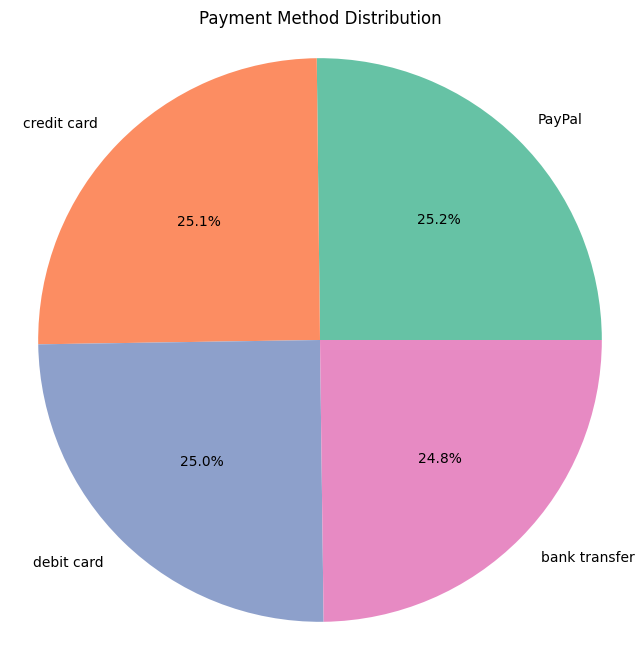

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['Payment Method'].value_counts(), labels=df['Payment Method'].unique(), autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

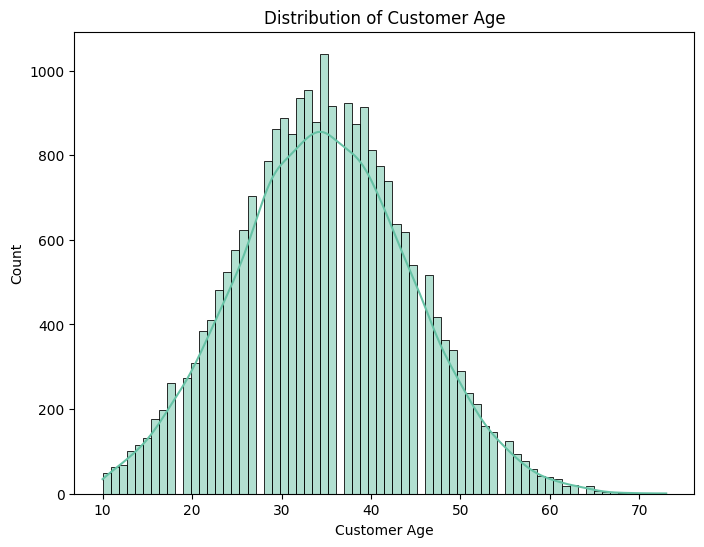

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Customer Age'], kde=True)
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
plt.show()

<ipython-input-49-5564167654c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=hour_count.index, y=hour_count.values,palette=colors)
<ipython-input-49-5564167654c9>:6: UserWarning: 
The palette list has fewer values (8) than needed (15) and will cycle, which may produce an uninterpretable plot.
  ax=sns.barplot(x=hour_count.index, y=hour_count.values,palette=colors)


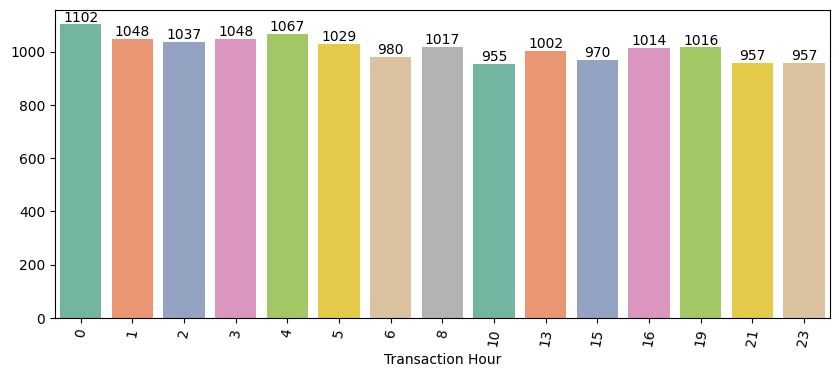

In [ ]:
hour_count = df["Transaction Hour"].value_counts().head(15)

plt.figure(figsize=(10,4))
sns.set_palette('Set2')
colors = sns.color_palette()
ax=sns.barplot(x=hour_count.index, y=hour_count.values,palette=colors)
plt.xticks(rotation=80)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

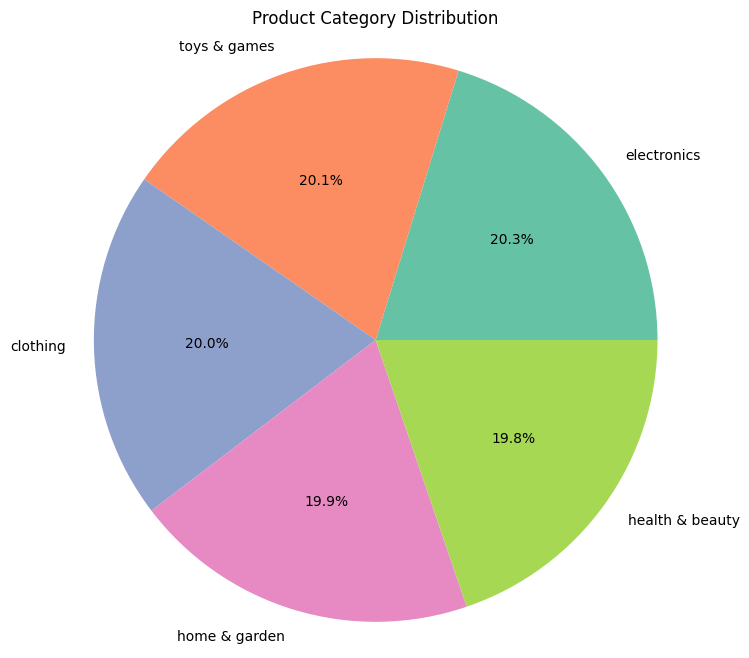

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['Product Category'].value_counts(), labels=df['Product Category'].unique(), autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.axis('equal')
plt.show()

Calculating mean, median, std deviation, variance, kurtosis and skewness of the field/column:Transaction ammount.

In [ ]:
# Calculate the mean
mean = df['Transaction Amount'].mean()

# Calculate the median
median = df['Transaction Amount'].median()

# Calculate the standard deviation
std = df['Transaction Amount'].std()

# Calculate the variance
var = df['Transaction Amount'].var()

# Calculate the skewness
skewness = df['Transaction Amount'].skew()

# Calculate the kurtosis
kurtosis = df['Transaction Amount'].kurt()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std}")
print(f"Variance: {var}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 229.36709867140559
Median: 151.415
Standard Deviation: 282.0466689918956
Variance: 79550.32348942393
Skewness: 6.696741230049215
Kurtosis: 109.71287546108292


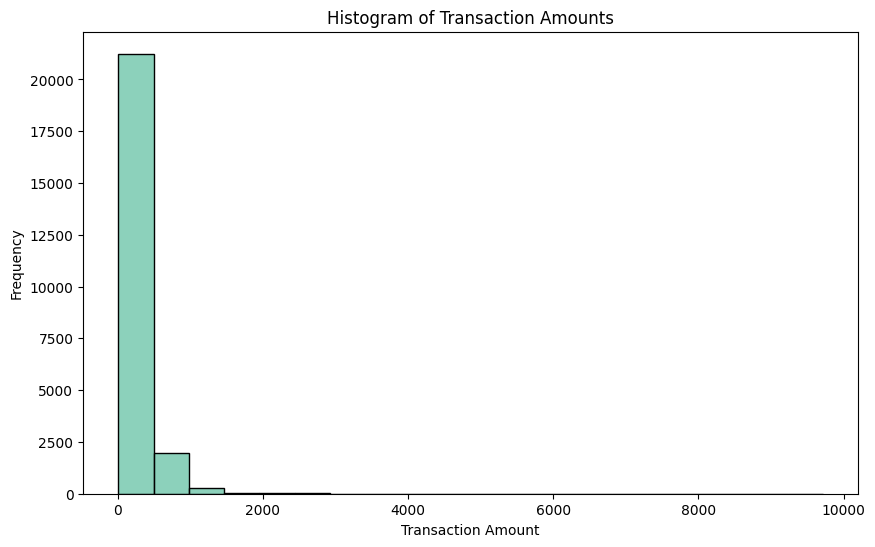

In [ ]:
# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=20)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()



*   The maximum transaction amount is between 0 and 2000
*   The data is right-skewed.




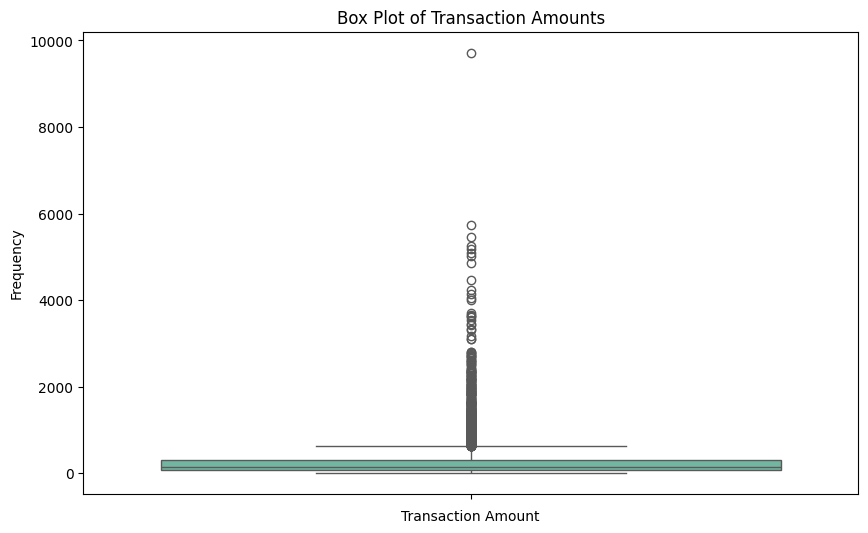

In [ ]:
#Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(df['Transaction Amount'])
plt.title('Box Plot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Fraudulent Distribution Based on Payment Method')

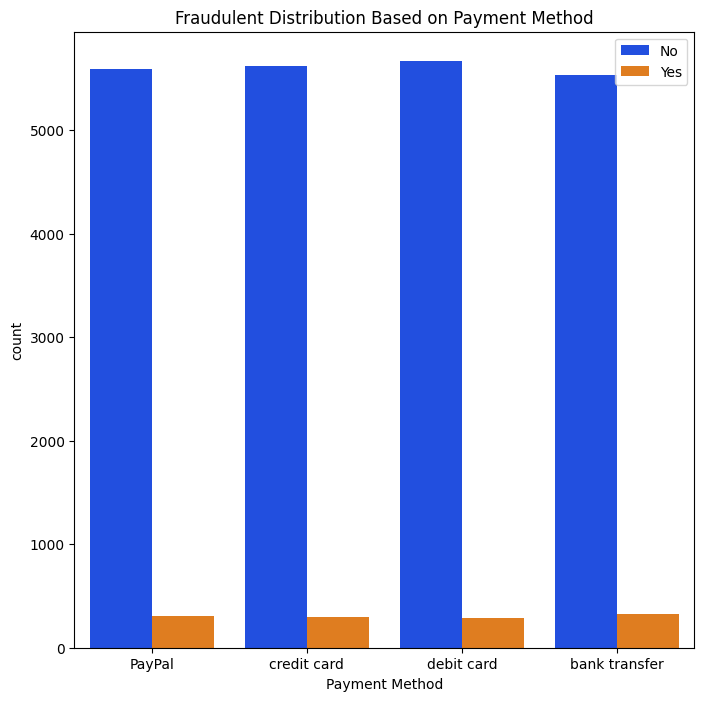

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x="Payment Method", data=df, palette='bright',hue='Is Fraudulent')
plt.legend(['No','Yes'])
plt.title('Fraudulent Distribution Based on Payment Method')

# 4. ML Algorithm application

**Random Forest Classifier method**



also included Undersampling for accuracy purposes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("/content/Fraudulent_E-Commerce_Transaction_Data_2.csv")

# Data preprocessing
data.drop(['Transaction ID', 'Customer ID', 'IP Address', 'Shipping Address', 'Billing Address', 'Transaction Date'], axis=1, inplace=True)
data.fillna(0, inplace=True)
data = pd.get_dummies(data)

# Split data into features (X) and target variable (y)
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
random_forest = RandomForestClassifier()

# Train the models
random_forest.fit(X_train, y_train)

# Predictions
rf_predictions = random_forest.predict(X_test)

# Classification report
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4485
           1       0.90      0.07      0.14       242

    accuracy                           0.95      4727
   macro avg       0.93      0.54      0.56      4727
weighted avg       0.95      0.95      0.93      4727



Conclusion

Based on the result, our model has great performance with overall accuracy of 95% with balanced precision, recall, and F1-score values of around 0.95-0.98 for both the target classes. though with undersampling we got 74% accuracy.